# CS-6570 Lecture 17 - Clustering
**Dylan Zwick**

*Weber State University*

**Clustering**

Today we're going to continue with the topic of "unsupervised learning" that we began last week with principle component analysis. To review, the idea behind "unsupervised" learning is that we're trying to derive information about our data but we're not trying to predict anything. This means that for our training data, we don't have a set of correct answers that we can use to gauge whether our model is performing. With unsupervised learning, it's hard to say what the "correct" answer is, and calls around this are inherently and necessarily more subjective.

Specifically, today we'll talk about *clustering*, which refers to a very broad set of techniques for finding groups, or *clusters*, within a data set. When we cluster data, we seek to partition them into distinct groups so that observations within each group are quite similar to each other, while observations in different groups are quite different from each other. Of course, to do this we must precisely define what we mean by "similar" and "different", which is often a domain-specific consideration that must be made based on knowledge of the data being studied. Always keep in mind (as this comes up in business contexts all the time) that a metric isn't something you derive - it's something you define.

One situation where you might apply clustering is in marketing. We may have access to a large number of measurements about many people, and we can to perform *market segmentation* by identifying subgroups of people who might be more receptive to a particular form of advertising, or more likely to purchase a particular product. Clustering has also been used for online dating tools. For example, back in 2008 [match.com](https://www.match.com/) advertised that they had a ["personality test"](https://www.24-7pressrelease.com/press-release/77946/matchcom-brings-science-to-the-art-of-matchmaking-with-match-insights) where, based on your answers to 56 questions, you could be categorized into one of four clusters: Explorer, Builder, Negotiator, or Director. This is a form of clustering with four clusters.

There are many clustering methods. Today, we'll focus on the two best-known approaches: *K-means* and *hierarchical*. In K-means clustering, we seek to partition the observations into a pre-specified number of clusters. The K in K-means is defined in advance as a hyperparameter. In hierarchical, we do not know in advance how many clusters we want, and make that call at the end. There are pros and cons to both.

**K-Means Clustering**

K-means is a simple method for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters $K$; then the algorithm assigns each observation to exactly one of the clusters. So, $K$ is yet another hyperparameter that must be specified before modeling begins.

To describe this algorithm, we'll start be defining some notation. Let $C_{1},\ldots,C_{K}$ denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:

1. $C_{1} \cup C_{2} \cup \cdots \cup C_{K} = \{1,2,\ldots,n\}$. In other words, each observation belongs to at least one of the $K$ clusters. aka "Mutually Exhausting. Every observation is in one of the clusters.
2. $C_{k} \cap C_{k'} = \emptyset$ for all $k \neq k'$. In other words, tho clusters are non-overlapping (disjoint). aka "Mutally Exclusive"

For example, if the $i$th observation is in the $k$th cluster, then $i \in C_{k}$. \in means in a set

An example of K-means clustering for different values of $K$ is the image below, which clusters 150 observations from simulated data. Note there is no ordering of the clusters, so the cluster coloring is arbitrary.

<center>
    <div>
        <img src="K-means clusters for different values of K.jpg" width="800"/>
    </div>
</center>

So, what makes a clustering "good"? Well, the idea behind K-means is that a "good" clustering is one for which the *within-cluster **variation*** is as small as possible. We can write this mathematically as:

$\displaystyle \underset{C_{1},\ldots,C_{K}}{minimize}\left\{\sum_{k = 1}^{K} W(C_{k})\right\}$

In words, this means we want to partition the observations into $K$ clusters such that the total within-cluster variation, summed over all $K$ clusters, is as small as possible.

To do this, we need to define the within-cluster variation. There are many ways to do this, but by far the most common choice uses ***squared Euclidean distance*** (very similar to the residual sum of square distances). For this, we define:

$\displaystyle W(C_{k}) = \frac{1}{|C_{k}|} \sum_{i, i' \in C_{k}}\sum_{j = 1}^{p} (x_{ij} - x_{i'j})^{2}$,

where $|C_{k}|$ denotes the number of observations in the $k$th cluster (this is a normalizing factor). Essentially for every point, you measure the difference in the X axis to the X axis of ALL other data points. Also repeat for the Y axis.

Now, finding the ideal partition precisely is a very difficult problem. There will be $K^{n}$ possible ways to partition $K$ clusters where n is the number of observations, which if $n$ is reasonably large is a very large number indeed. The $K$-means algorithm doesn't find what is guaranteed to be the best partition, but usually finds a pretty good one (local minimum, gets much better if you run it many times with different starting seed values). An outline of this algorithm is:

1. Randomly assign a cluster to each data point, from $1$ to $K$, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:
    
    (a) For each of the $K$ clusters, compute the cluster *centroid*. The $k$th cluster centroid is the vector of the $p$ feature means for the observations in the $k$th cluster.
    
    (b) Assign each observation to the cluster whose centroid is closest (where *closest* is defined using Euclidean distance.)
    
This algorithm is __guaranteed__ to decrease the value of the objective at each step, and stops when the objective stops increasing.

An example of the K-means algorithm in action is below, with K = 3.

<center>
    <div>
        <img src="K-means Cluster Iterations.jpg" width="600"/>
    </div>
</center>

Because the K-means algorithm find a local rather than a global optimum, the results obtained will depend on the initial (random) cluster assignment of each observation in Step 1 of the algorithm. For this reason, it's important to run the algorithm multiple times from different random initial configurations. Then one selects the *best* solution - the one for which the objective function is smallest.

An example of the end result for six different initial distributions is:

<center>
    <div>
        <img src="K-means with different initial distributions.jpg" width="600"/>
    </div>
</center>

We note that three of these found the same clusters, which are the best performing in terms of within-cluster variation.

To investigate K-means clustering with some data in Python, let's first import our favorite libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll also want to import the [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm from the *cluster* library in sklearn.

In [4]:
from sklearn.cluster import KMeans

We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [5]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

# Shift the first 25 over by 3 on the X and down 4 on the Y

If we chart these we see:

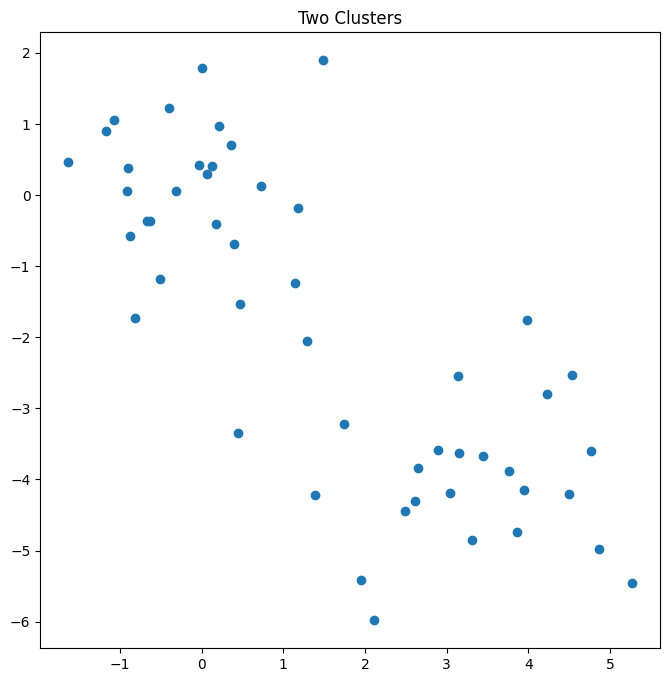

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1])
ax.set_title("Two Clusters");

We can now perform K-means clustering with $K = 2$:

In [7]:
kmeans = KMeans(n_clusters=2,
                random_state=2, # Seed the random generation of the initial assignments. Set so that it's the same for class
                n_init=20).fit(X) # n_init is the number of inital distributions that it explores

The specification of the random state makes the results reproducible. The *n_init* term is the number of times K-means is run with different initial values. From all these runs the one with the smallest within-cluster variation is chosen. We can examine the labels of our model to view which observation was placed in which cluster.

In [8]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

We can also graph the chart above again, only this time with the points colored by cluster:

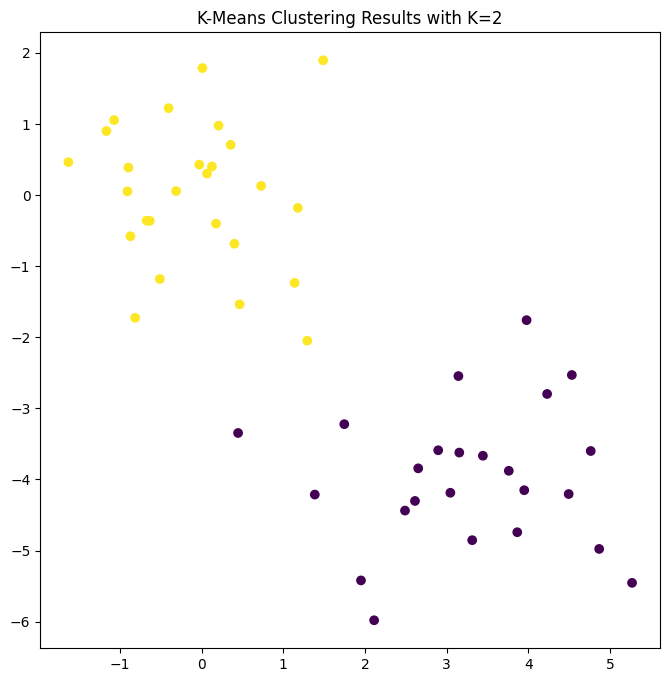

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

Our generated data has two clusters by design. However, if we set $K = 3$ we can also observe the clusters we get:

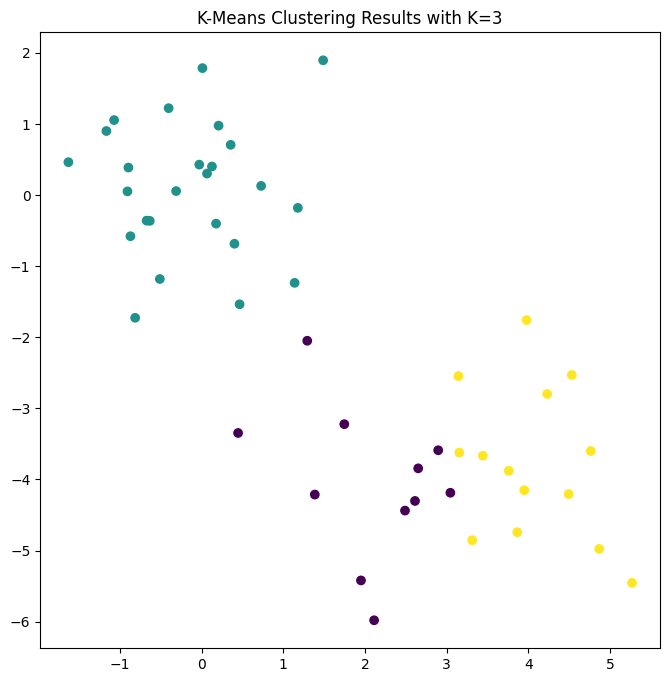

In [10]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

**Hierarchical Clustering**

One potential disadvantage of K-means clustering is it requires us to pre-specify the number of clusters. *Hierarchical clustering* is an alternative approach which does not. It instead results in an attractive tree-based representation of the observations, called a *dendogram*. Here we'll describe "bottom-up" or "agglomerative" clustering, which is the most common type of hierarchical clustering. If looking at humans, a two-way cluster based on genetics will almost always yield men v women. 

The hierarchical clustering dendogram is obtained via an extremely simple algorithm. It begins by defining some sort of *dissimilarity* measure (like Euclidean distance) between each pair of observations. **All $n$ observations are initially clusters**, and the **two clusters that are most similar are then *fused*** so there are now $n-1$ clusters. This is then iteratively repeated until there is only one cluster. However, while we may have a definition of dissimilarity between two observations, this isn't enough if we want to merge (fuse) clusters with more than one observation. We need some measure of dissimilarity between groups of observations. This extension is achieved by developing the notion of *linkage*, which defines the dissimilarity between two groups of observations. The four most common types of linkage are *complete*, *average*, *single*, and *centroid*.

| Linkage | Description |
| --- | --- |
| Complete | **Maximal** intercluster dissimilarity. Compute all pairwise  dissimilarities between the observations in cluster A and the observations in cluster B, and record the *largest* of these dissimilarities. |
| Single | **Minimal** intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the *smallest* of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time. |
| Average | **Mean** intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the *average* of these dissimilarities. |
| Centroid | Dissimilarity between the **centroid** for cluster A (a mean vector of length $p$) and the centroid for cluster B. Centroid linkage can result in undesirable *inversions*. Very popular for genetics; however, the later fusings can have a lower dissimilarity than earlier clusterings. Basically, the centroid moves in sub-optimal ways (inversions)|

Complete, single, average linkage are most popular among statisticians. Average and complete linkage are g enerally preferred over single linkage, as they tend to yield more balanced dendograms. Centroid linkage is often used in genomics, but suffers from a major drawback in that an *inversion* can occur, whereby two clusters are fused at a heigh *below* either of the individual clusters in the dendogram. Generally speaking, the dendogram depends quite strongly on the type of linkage used.

Once a dissimilarity measure has been chosen, the algorithm proceeds as follows:

1. Begin with $n$ observations and a measure (such as Euclidean distance) of all the $\displaystyle {n \choose 2} = \frac{n(n-1)}{2}$ pairwise dissimilarities. Treat each observation as its own cluster.

2. For $i = n, n-1, \ldots , 2$:

    (a) Examine all pairwise inter-cluster dissimilarities among the $i$ clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendogram at which the fusion should be placed.
    
    (b) Compute the new pairwise inter-cluster dissimilarities among the $i-1$ clusters.
    


The [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) function from sklearn's clustering library implements hierarchical clustering. As its name is long, we use the short hand HClust for hierarchical clustering. Note that this will not change the return type, so instances will still be of class AgglomerativeClustering. We'll also create our own function for clustering using complete linkage. The distance threshold is the threshold at or above which clusters will not be merged.

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X);

We can use [dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) from scipy.cluster.hierarchy to plot the dendrogram. However, it expects a so-called linkage-matrix representation of the clustering, which is not provided by *AgglomerativeClustering*, but can be computed. The function compute_linkage() below will do this. Don't worry about understanding it, just load it.

In [13]:
def compute_linkage(hclust):
    """

    Create linkage matrix used to plot a dendrogram

    Follows [sklearn example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

    Parameters
    ----------

    hclust : `sklearn.cluster.AgglomerativeClustering`
        Fitted hierarchical clustering object.

    Returns
    -------

    linkage_matrix : np.ndarray
        Array to be passed to `dendrogram` from `scipy.cluster.hierarchy`.

    """
    
    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)
    for i, merge in enumerate(hclust.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([hclust.children_, hclust.distances_,
                                      counts]).astype(float)
    return linkage_matrix

In [14]:
from scipy.cluster.hierarchy import dendrogram

We can now plot the dendrograms. The numbers at the bottom of the plot identify each observation. The *dendrogram* function has a default method to color different branches of the tree that suggests a pre-defined cut of the tree at a particular depth. We may want to override this and color branches of the tree below a cut-threshold that we specify. This can be achieved by changing the `color_threshold`. Let’s cut the tree at a height of 4, coloring links that merge above 4 in black.

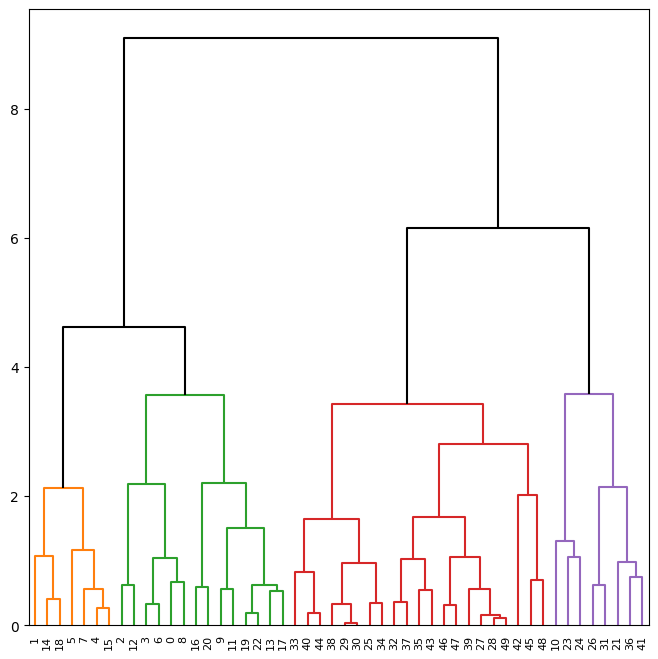

In [15]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` 
function from `scipy.cluster.hierarchy`:

In [16]:
from scipy.cluster.hierarchy import cut_tree

In [17]:
cut_tree(linkage_comp, n_clusters=4).T


array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

In [18]:
cut_tree(linkage_comp, height=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

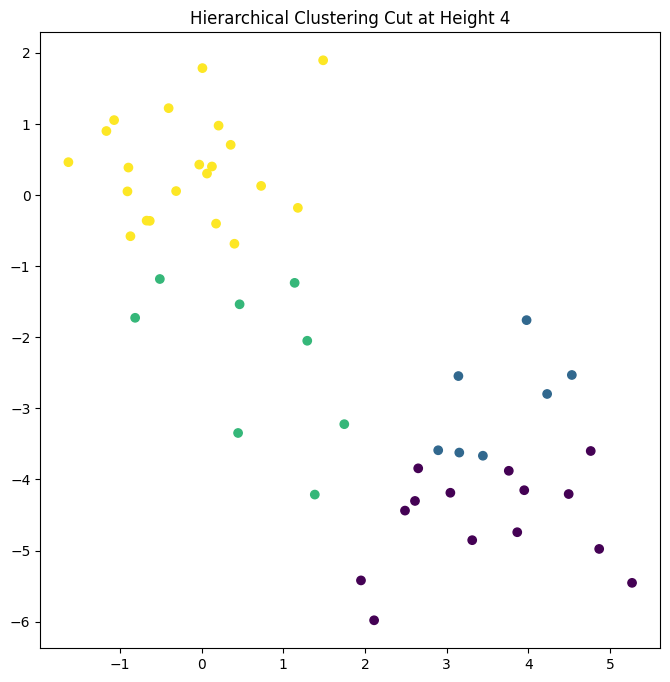

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=cut_tree(linkage_comp, height = 4))
ax.set_title("Hierarchical Clustering Cut at Height 4");

**A Note About Scale**

The dissimilarity measures used for clustering are **typically dependent on the scale of the data. Consequently, you may want to scale your data before you start clustering. ** The *preprocessing* library in sklearn provides a function that does this called StandardScaler. In other words, if one measurement is in nanometers and the other in kilometers, you will overweight the nanometers

In [20]:
from sklearn.preprocessing import StandardScaler